In [57]:
import numpy as np
import matplotlib.pyplot as plt

In [58]:
lst_fit = []

In [59]:
import pygame
import os
import random
import math
import sys
import numpy as np
# from genetic import Genetic
pygame.init()


# Global Constants
SCREEN_HEIGHT = 600
SCREEN_WIDTH = 1100
SCREEN = pygame.display.set_mode((SCREEN_WIDTH, SCREEN_HEIGHT))

RUNNING = [pygame.image.load(os.path.join("Assets/Dino", "DinoRun1.png")),
           pygame.image.load(os.path.join("Assets/Dino", "DinoRun2.png"))]

JUMPING = pygame.image.load(os.path.join("Assets/Dino", "DinoJump.png"))

DUCKING = [pygame.image.load(os.path.join("Assets/Dino", "DinoDuck1.png")),
           pygame.image.load(os.path.join("Assets/Dino", "DinoDuck2.png"))]
SMALL_CACTUS = [pygame.image.load(os.path.join("Assets/Cactus", "SmallCactus1.png")),
                pygame.image.load(os.path.join("Assets/Cactus", "SmallCactus2.png")),
                pygame.image.load(os.path.join("Assets/Cactus", "SmallCactus3.png"))]
LARGE_CACTUS = [pygame.image.load(os.path.join("Assets/Cactus", "LargeCactus1.png")),
                pygame.image.load(os.path.join("Assets/Cactus", "LargeCactus2.png")),
                pygame.image.load(os.path.join("Assets/Cactus", "LargeCactus3.png"))]

BIRD = [pygame.image.load(os.path.join("Assets/Bird", "Bird1.png")),
        pygame.image.load(os.path.join("Assets/Bird", "Bird2.png"))]

BG = pygame.image.load(os.path.join("Assets/Other", "Track.png"))

FONT = pygame.font.Font('freesansbold.ttf', 20)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))
class Dinosaur:
    X_POS = 80
    Y_POS = 310
    JUMP_VEL = 8.5

    def __init__(self, img=RUNNING[0]):
        self.image = img
        self.dino_run = True
        self.dino_jump = False
        self.dino_duck = False
        self.jump_vel = self.JUMP_VEL
        self.rect = pygame.Rect(self.X_POS, self.Y_POS, img.get_width(), img.get_height())
        self.color = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
        self.step_index = 0
        # self.W = np.random.randn(8,4)
        # self.W2 = np.random.randn(3,8)
        self.W = np.random.rand(8,4)*2-1
        self.W2 = np.random.rand(3,8)*2-1
        self.score = 0
    def update(self):
        if self.dino_run:
            self.run()
        if self.dino_jump:
            self.jump()
        if self.dino_duck:
            self.duck()
        if self.step_index >= 10:
            self.step_index = 0

    def jump(self):
        self.image = JUMPING
        if self.dino_jump:
            self.rect.y -= self.jump_vel * 4
            self.jump_vel -= 0.8
        if self.jump_vel <= -self.JUMP_VEL:
            self.dino_jump = False
            self.dino_run = True
            self.jump_vel = self.JUMP_VEL

    def run(self):
        self.image = RUNNING[self.step_index // 5]
        self.rect.x = self.X_POS
        self.rect.y = self.Y_POS
        self.step_index += 1


    def duck(self):
        self.image = DUCKING[self.step_index // 5]
        self.rect.x = self.X_POS
        self.rect.y = self.Y_POS+40
        self.step_index += 1


    def draw(self, SCREEN):
        SCREEN.blit(self.image, (self.rect.x, self.rect.y))
        pygame.draw.rect(SCREEN, self.color, (self.rect.x, self.rect.y, self.rect.width, self.rect.height), 2)
        for obstacle in obstacles:
            pygame.draw.line(SCREEN, self.color, (self.rect.x + 54, self.rect.y + 12), obstacle.rect.center, 2)


class Obstacle:
    def __init__(self, image, num_ob):
        self.image = image
        self.type = num_ob
        self.rect = self.image[self.type].get_rect()
        self.rect.x = SCREEN_WIDTH * game_speed / 20

    def update(self):
        self.rect.x -= game_speed*0.9
        if self.rect.x < -self.rect.width:
            obstacles.pop()

    def draw(self, SCREEN):
        SCREEN.blit(self.image[self.type], self.rect)


class SmallCactus(Obstacle):
    def __init__(self, image, num_ob):
        super().__init__(image, num_ob)
        self.rect.y = 325


class LargeCactus(Obstacle):
    def __init__(self, image, num_ob):
        super().__init__(image, num_ob)
        self.rect.y = 300

class Bird(Obstacle):
    def __init__(self, image, num_ob):
        super().__init__(image, num_ob)
        self.rect.y = 250 + random.choice([-50,50,15,-75])

def remove(index):
    dinosaurs.pop(index)


def distance(pos_a, pos_b):
    dx = pos_a[0]-pos_b[0]
    dy = pos_a[1]-pos_b[1]
    return math.sqrt(dx**2+dy**2)

class Genetic:
    def __init__(self,num_gen=10,num_pop=100):
        self.num_gen = num_gen
        self.num_pop = num_pop
        self.gen_count = 0
        self.gen = []
        self.gen_best = []
        for _ in range(self.num_pop):
            self.gen.append(Dinosaur())

    def crossover(self,dino1,dino2):
        child = Dinosaur()
        choice1 = np.random.randint(2, size = dino1.W.shape).astype(bool)
        choice2 = np.random.randint(2, size = dino1.W2.shape).astype(bool)
        child.W = np.where(choice1,dino1.W,dino2.W)
        child.W2 = np.where(choice2,dino1.W2,dino2.W2)
        return child

    def linear_crossover(self,dino1,dino2):
        child = Dinosaur()
        choice1 = np.random.randint(2, size = dino1.W.shape).astype(bool)
        choice2 = np.random.randint(2, size = dino1.W2.shape).astype(bool)
        if np.random.rand()<0.5:
            child.W = np.where(choice1,dino1.W,dino1.W * 0.5 + dino2.W * 0.5)
        else:
            child.W = np.where(choice1,dino2.W,dino1.W * 0.5 + dino2.W * 0.5)

        if np.random.rand()<0.5:
            child.W2 = np.where(choice2,dino1.W2,dino1.W2 * 0.5 + dino2.W2 * 0.5)
        else:
            child.W2 = np.where(choice2,dino2.W2,dino1.W2 * 0.5 + dino2.W2 * 0.5)
        return child
    def mutation(self,dino):
        dino.W+=np.random.randn(dino.W.size).reshape(dino.W.shape)*0.1
        dino.W2+=np.random.randn(dino.W2.size).reshape(dino.W2.shape)*0.1
        return dino

    def fitness(self,dino):
        return dino.score

    def reset(self):
        self.gen = []
    
    def next_gen(self):
        # for _ in range(5):
        #     self.gen_best = list(self.gen_best)
        #     self.gen_best.append(Dinosaur())
        for dino in self.gen_best:
            self.gen.append(dino)
        fitness = np.array([dino.score for dino in self.gen_best])
        while len(self.gen) < self.num_pop:
            dino1,dino2 = np.random.choice(self.gen_best,size=2,p=fitness/sum(fitness),replace=False)

            if np.random.rand() <1:
                child = self.crossover(dino1,dino2)
            else:
                child = self.linear_crossover(dino1,dino2)
            if np.random.rand()<0.2:
                self.gen.append(self.mutation(child))
            else:
                self.gen.append(child)
    
    def evaluate(self):
        fitness = [self.fitness(dino) for dino in self.gen]
        self.gen_best = np.array(self.gen)[np.argsort(fitness)][-15:]
        self.reset()
        lst_fit.append(np.array(fitness)[np.argsort(fitness)][-1])
        # print(self.gen_best)
        print(f'Fitness:{np.array(fitness)[np.argsort(fitness)][-15:]}')

def train(num_gen=10,num_dino=100,fps=30):
    global game_speed, x_pos_bg, y_pos_bg, obstacles, dinosaurs, points
    clock = pygame.time.Clock()
    

    x_pos_bg = 0
    y_pos_bg = 380
    game_speed = 20

    genetic = Genetic(num_pop=num_dino)
    for num in range(num_gen):
        game_speed = 20
        genetic.gen_count+=1
        if num!=0:
            genetic.next_gen()
        else:
            pass
        points = 0
        obstacles = []
        dinosaurs = []
        for dino in genetic.gen:
            dinosaurs.append(dino)


        def score():
            global points, game_speed
            points += 1
            if points % 100 == 0:
                game_speed += 1
                game_speed = min(40,game_speed)
            text = FONT.render(f'Points:  {str(points)}', True, (0, 0, 0))
            SCREEN.blit(text, (950, 50))

        def statistics():
            global dinosaurs, game_speed, ge
            text_1 = FONT.render(f'Dinosaurs Alive:  {str(len(dinosaurs))}', True, (0, 0, 0))
            text_2 = FONT.render(f'Generation:  {genetic.gen_count}', True, (0, 0, 0))
            text_3 = FONT.render(f'Game Speed:  {str(game_speed)}', True, (0, 0, 0))

            SCREEN.blit(text_1, (50, 450))
            SCREEN.blit(text_2, (50, 480))
            SCREEN.blit(text_3, (50, 510))

        def background():
            global x_pos_bg, y_pos_bg
            image_width = BG.get_width()
            SCREEN.blit(BG, (x_pos_bg, y_pos_bg))
            SCREEN.blit(BG, (image_width + x_pos_bg, y_pos_bg))
            if x_pos_bg <= -image_width:
                x_pos_bg = 0
            x_pos_bg -= game_speed

        run = True
        while run:
            for event in pygame.event.get():
                if event.type == pygame.QUIT:
                    pygame.quit()
                    sys.exit()

            SCREEN.fill((255, 255, 255))

            for dinosaur in dinosaurs:
                dinosaur.update()
                dinosaur.draw(SCREEN)

            if len(dinosaurs) == 0:
                break

            if len(obstacles) == 0:
                rand_int = random.randint(0, 2)
                if rand_int == 0:
                    obstacles.append(SmallCactus(SMALL_CACTUS, random.randint(0, 2)))
                elif rand_int == 1:
                    obstacles.append(LargeCactus(LARGE_CACTUS, random.randint(0, 2)))
                elif rand_int == 2:
                    obstacles.append(Bird(BIRD, random.randint(0, 1)))
            for obstacle in obstacles:
                obstacle.draw(SCREEN)
                
                obstacle.update()
                for i, dinosaur in enumerate(dinosaurs):
                    if dinosaur.rect.colliderect(obstacle.rect):
                        dinosaur.score = points
                        remove(i)
                    # print(len(dinosaurs))

            for i, dinosaur in enumerate(dinosaurs):
                if dinosaur.rect.y == dinosaur.Y_POS:
                    # output = dinosaur.W @ np.array([dinosaur.rect.y,distance((dinosaur.rect.x, dinosaur.rect.y),obstacle.rect.midtop)],dtype=float).reshape(-1,1)
                    output = dinosaur.W @ np.array([dinosaur.rect.y,obstacle.rect.x,obstacle.rect.y,distance((dinosaur.rect.x, dinosaur.rect.y),obstacle.rect.midtop)],dtype=float).reshape(-1,1)
                    # output = sigmoid(output)
                    output   = np.maximum(output,0)
                    output = dinosaur.W2 @ output
                    output = output.reshape(-1)
                    # print(output)
                    # output /= sum(output)
                    if np.argmax(output)==0 :
                        dinosaur.dino_jump = True
                        dinosaur.dino_run = False
                        dinosaur.dino_duck = False
                    elif np.argmax(output)==1 :
                        dinosaur.dino_jump = False
                        dinosaur.dino_run = False
                        dinosaur.dino_duck = True


            statistics()
            score()
            background()
            clock.tick(fps)
            pygame.display.update()
        
        genetic.evaluate()

train(num_gen=100,num_dino=100,fps=600)

Fitness:[ 181  181  181  181  181  181  181  182  182  182  183  183  184  566
 1004]
Fitness:[185 185 185 185 185 186 186 186 250 251 441 441 441 442 443]
Fitness:[117 118 183 183 183 183 183 183 184 184 184 185 185 186 191]
Fitness:[117 118 118 118 118 118 118 118 119 119 119 120 120 121 430]
Fitness:[117 117 117 117 117 117 118 118 118 118 185 318 569 697 698]
Fitness:[119 119 119 120 120 120 120 120 121 121 121 122 122 184 244]
Fitness:[246 246 246 246 246 246 247 247 247 247 248 312 312 313 316]
Fitness:[186 186 186 187 187 187 252 252 252 253 253 253 254 255 256]
Fitness:[181 181 182 182 183 183 183 183 184 184 184 185 185 186 187]
Fitness:[566 630 630 630 630 630 631 631 942 942 942 942 943 943 944]
Fitness:[  57   58   58  117  117  117  117  117  117  118  118  119  120 1006
 1760]
Fitness:[179 180 181 181 182 183 185 187 305 305 305 306 431 431 432]
Fitness:[ 252  252  252  252  253  253  253  890  890  890  891  892 1715 1716
 2285]
Fitness:[ 945  945  945  946  946  946  94

SystemExit: 

c:\ProgramData\Anaconda3\envs\gymenv\lib\site-packages\IPython\core\interactiveshell.py:3406: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


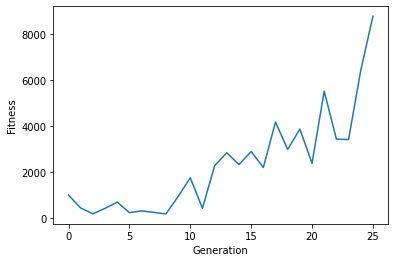

In [66]:
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.plot(lst_fit[:-7])

In [1]:
import numpy as np

In [8]:
a = np.array([1,2,3,4])
p = np.array([0.1,0.1,0.1,.7])

In [16]:
b,c = np.random.choice(a,size=2,p=p)
b,c

(4, 4)

In [ ]:
if dino_eval.rect.y == dino_eval.Y_POS:
            # output = dino_eval.W @ np.array([dino_eval.rect.y,distance((dino_eval.rect.x, dino_eval.rect.y),obstacle.rect.midtop)],dtype=float).reshape(-1,1)
            output = dino_eval.W @ np.array([dino_eval.rect.y,obstacle.rect.x,obstacle.rect.y,distance((dino_eval.rect.x, dino_eval.rect.y),obstacle.rect.midtop)],dtype=float).reshape(-1,1)
            # output = sigmoid(output)
            output   = np.maximum(output,0)
            output = dino_eval.W2 @ output
            output = output.reshape(-1)
            # print(output)
            # output /= sum(output)
            if np.argmax(output)==0 :
                dino_eval.dino_jump = True
                dino_eval.dino_run = False
                dino_eval.dino_duck = False
            elif np.argmax(output)==1 :
                dino_eval.dino_jump = False
                dino_eval.dino_run = False
                dino_eval.dino_duck = True